# Lending Club Default Rate Analysis (draft )

In [305]:
# Import our libraries we are going to use for our data analysis.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly
plotly.tools.set_credentials_file(username='guancp', api_key='Xzyn9E9TVSV4kRcS6Acr')


# Plotly visualizations
from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#plotly.tools.set_credentials_file(username='guancp', api_key='Xzyn9E9TVSV4kRcS6Acr')


# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Other Libraries
import time
pd.set_option('display.max_columns', None)

% matplotlib inline

df = pd.read_csv('Downloads/loan_clean.csv', low_memory=False)

# Copy of the dataframe
original_df = df.copy()

df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_title,emp_length,home_ownership,annual_inc,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_reason,hardship_status,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,issue_d_1,issue_year,issue_mon,last_pymnt_d_1,last_pymnt_year,last_pymnt_mon,last_pymnt_from_issue,last_pymnt_from_issue_cat,loan_status_binary,mths_since_last_credit_pull,mths_since_crline
0,1,NaN,NaN,12000,12000,12000.0,60 months,237.45,Teacher,> 8 years,MORTGAGE,54000.0,2016-03-01,Current,n,NaN,debt_consolidation,210xx,MD,13.00,0,2003-04-01,0,"(30,68]",not_avail,4,0,6825,68.9%,19,w,7306.62,7306.62,6164.410000,6164.41,4693.38,1471.03,0.0,0.0,0.0,17683,237.45,17683,0,not_avail,Individual,199482,0,1,0,1,"(13,50]",11704,"(32,96]",0,0,6107,74,9900,0,1,1,1,49871,1893.0,76.3,"(54,181]",152,40,21,1,"(57,564]",not_avail,"(5,16]","(32,71]",0,1,2,4,7,2,2,4,0,0,94.7,100.0,0,0,230114,8000,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_avail,N,no_hs,no_hs,0.0,17410,17501,17440,0,no_hs,0.0,0.0,0.0,Cash,N,17563,NaN,17501,0.0,0.0,0,2016-03-01,2016,3,17683,2018,6,822,no pymnt,okay,-7,177
1,2,NaN,NaN,8000,8000,8000.0,36 months,265.68,Boat Captain,< 3 years,RENT,80000.0,2016-03-01,Current,n,NaN,debt_consolidation,325xx,FL,13.68,0,2009-05-01,0,not_avail,"(32,68]",5,1,2752,45.9%,11,w,2537.08,2537.08,6996.050000,6996.05,5462.92,1473.13,60.0,0.0,0.0,17683,265.68,17683,0,not_avail,Individual,14494,0,3,2,2,"(3,13]",11742,"(32,96]",0,1,0,46,6000,0,9,2,3,2899,5284.5,62.4,"(54,181]",52,16,7,0,not_avail,not_avail,"(5,16]",not_avail,0,0,2,0,8,2,2,5,0,2,100.0,40.0,0,1,31232,0,25232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_avail,N,no_hs,no_hs,0.0,17410,17501,17440,0,no_hs,0.0,0.0,0.0,Cash,N,17563,NaN,17501,0.0,0.0,0,2016-03-01,2016,3,17683,2018,6,822,no pymnt,okay,-7,103
2,3,NaN,NaN,8200,8200,8200.0,36 months,270.29,Registered Nurse,> 8 years,RENT,70000.0,2016-03-01,Fully Paid,n,NaN,debt_consolidation,391xx,MS,12.74,0,2006-06-01,1,"(68,192]","(32,68]",10,5,6337,41.7%,18,w,0.00,0.00,9387.763617,9387.76,8200.00,1187.76,0.0,0.0,0.0,17501,4262.70,17622,0,not_avail,Individual,37329,1,1,0,1,"(13,50]",30992,"(-0.01,32]",1,3,4536,42,15200,1,0,1,4,4666,2963.0,68.1,"(-0.01,54]",117,3,3,0,"(-1,3]",not_avail,"(-1,1]","(71,197]

In [306]:
df['loan_status_binary'].values

array(['okay', 'okay', 'okay', ..., 'past_due', 'okay', 'okay'],
      dtype=object)

In [307]:
#rename the columns
df = df.rename(columns={"loan_amnt": "loan_amount", "funded_amnt": "funded_amount", "funded_amnt_inv": "investor_funds",
                       "int_rate": "interest_rate", "annual_inc": "annual_income"})

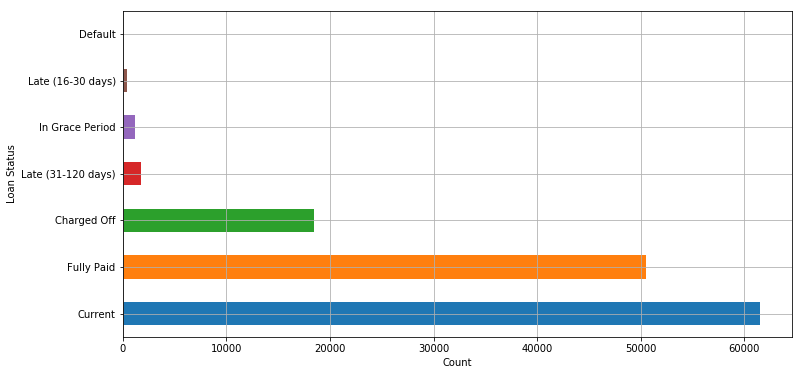

In [308]:
plt.figure(figsize= (12,6))
plt.ylabel('Loan Status')
plt.xlabel('Count')
df['loan_status'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

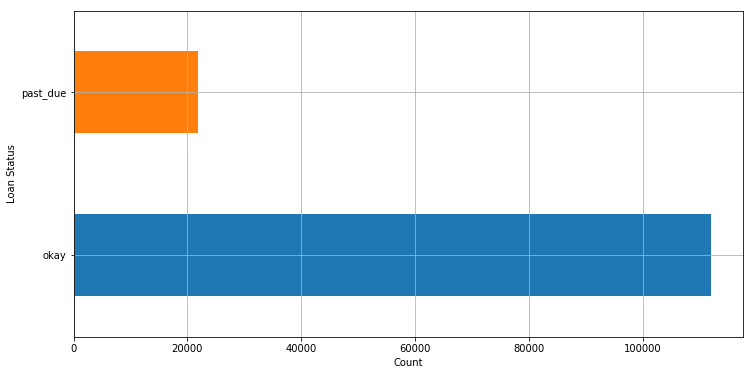

In [309]:
plt.figure(figsize= (12,6))
plt.ylabel('Loan Status')
plt.xlabel('Count')
df['loan_status_binary'].value_counts().plot(kind = 'barh', grid = True)
plt.show()

In [310]:
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']



df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
df['region'] = df['addr_state'].apply(finding_regions)    

In [311]:
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amount.sum()

by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_income.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amount'].values.tolist()

average_annual_income = by_income['annual_income'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            
                            ('annual_income', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()





,state_codes,issued_loans,annual_income
0,IL,86688050,83091.57
1,IN,35074350,77618.09
2,KS,17611150,79697.13
3,MI,51333400,72880.04
4,MN,35931575,78319.85


In [312]:
import plotly.plotly as py
import plotly.graph_objs as go


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average annual income: ' + metrics_df['annual_income'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans ',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

In [313]:
lst = [df]
df['loan_status_int'] = np.nan

for col in lst:
    col.loc[df['loan_status_binary'] == 'past_due', 'loan_status_int'] = 0 # Negative (Bad Loan)
    col.loc[df['loan_status_binary'] == 'okay', 'loan_status_int'] = 1 # Positive (Good Loan)
    
# Convert from float to int the column (This is our label)  
df['loan_status_int'] = df['loan_status_int'].astype(int)

In [315]:
by_condition = df.groupby('addr_state')['loan_status_int'].value_counts()/ df.groupby('addr_state')['loan_status_int'].count()
#by_emp_length = df.groupby(['region', 'addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_condition_bystate = pd.crosstab(df['addr_state'], df['loan_status_int'] )

cross_condition = pd.crosstab(df["addr_state"], df["loan_status_int"])
# Percentage of condition of loan
percentage_loan_contributor = pd.crosstab(df['addr_state'], df['loan_status_int']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition[0]/cross_condition[1]
by_dti = df.groupby(['region', 'addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)


#Take to a list
default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor[0].values.tolist()
number_of_badloans = loan_condition_bystate[0].values.tolist()


risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti)])


risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)


## Plot Default Rate

In [316]:
for col in risk_df.columns:
    risk_df[col] = risk_df[col].astype(str)
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],\
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(232, 70, 54)'],[1.0, 'rgb(212, 31, 13)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['badloans_amount'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_badloans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['default_ratio'], 
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Lending Clubs Default Rates ',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

#### Hot encode categorical data

In [317]:
columns = [ 'purpose', 'application_type','addr_state',
           'pymnt_plan', 'initial_list_status',"home_ownership",
          "hardship_flag","hardship_status","disbursement_method","debt_settlement_flag","settlement_status"]

for col in columns:
    tmp_df = pd.get_dummies(df[col], prefix=col)
    df = pd.concat((df, tmp_df), axis=1)

In [318]:
df.drop(['loan_status',
           'addr_state',
  
           "region",
           'initial_list_status',
           'pymnt_plan',
           "loan_status_binary",
           'purpose',
           'application_type'], axis=1, inplace=True)

In [319]:
df.drop(['last_pymnt_from_issue_cat'], axis=1, inplace=True)

In [320]:
df.drop(["term","emp_title","home_ownership","id","member_id","url",
         "emp_length","issue_d", "zip_code","mths_since_last_delinq",
       "earliest_cr_line","mths_since_last_record","revol_util",
         "mths_since_last_major_derog","mths_since_rcnt_il",
        "il_util", "mo_sin_old_il_acct","mths_since_recent_bc", "mths_since_recent_bc_dlq",
         "mths_since_recent_inq", "mths_since_recent_revol_delinq", "sec_app_mths_since_last_major_derog","hardship_flag",
        "hardship_reason","hardship_status","hardship_loan_status","disbursement_method","debt_settlement_flag","settlement_status", "issue_d_1"
        ], axis=1, inplace=True)

In [321]:
df.dropna(axis=1,inplace=True)

In [322]:
from sklearn.model_selection import train_test_split

y = df['loan_status_int']
X = df.ix[:, df.columns != 'loan_status_int']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=44)

/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



### Oversampling

In [324]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning:

Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.



### SVM

In [325]:
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [326]:
df2 = df.copy()

In [327]:
df2 = df2[:20000]

In [328]:
y2 = df2['loan_status_int']
X2 = df2.ix[:, df.columns != 'loan_status_int']

X_train2, X_test2, y_train2, y_test2 = train_test_split (X2, y2, test_size=0.3, random_state=44)

/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [331]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train2_res, y_train2_res = sm.fit_sample(X_train2, y_train2)

/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning:

Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.



In [332]:
y_0 = len(y_train2_res[y_train2_res == 0])/len(y_train2_res)
y_1 = 1 - y_0

In [335]:
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score

# Flatten Data
from sklearn.preprocessing import StandardScaler, RobustScaler

#std_scaler = StandardScaler()
rob_scaler = RobustScaler()

#X_train_S = std_scaler.fit_transform(X_train)
#X_test_S = std_scaler.transform(X_test)

# Use robust scaler to reduce outliers
X_train_R = rob_scaler.fit_transform(X_train2_res)
X_test_R = rob_scaler.transform(X_test2)

In [336]:
svm_clf = SVC(class_weight={0:y_1, 1:y_0})
svm_clf.fit(X_train_R, y_train2_res)

svm_predictions = svm_clf.predict(X_test_R) # Save prediction


#print(svm_clf.score(X_test_R, y_test))
scores = cross_val_score(svm_clf, X_test_R, y_test2, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(mt.classification_report(y_test2, svm_predictions))
print(mt.confusion_matrix(y_test, svm_predictions))

[0.9450458  0.95416667 0.92916667 0.93416667 0.93494579]
Accuracy: 0.94 (+/- 0.02)

             precision    recall  f1-score   support

          0       0.81      0.88      0.84       984
          1       0.98      0.96      0.97      5016

avg / total       0.95      0.95      0.95      6000



ValueError: Found input variables with inconsistent numbers of samples: [40167, 6000]

## Random Forest

In [337]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 20)
rf.fit(X_train_res, y_train_res)
       
rf_predictions = rf.predict(X_test)

#print(rf.score(X_test, y_test))
scores = cross_val_score(rf, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(mt.classification_report(y_test, rf_predictions))
print(mt.confusion_matrix(y_test, rf_predictions))


[0.99153597 0.99103809 0.99203386 0.98966762 0.99066235]
Accuracy: 0.99 (+/- 0.00)

             precision    recall  f1-score   support

          0       0.99      0.96      0.97      6484
          1       0.99      1.00      1.00     33683

avg / total       0.99      0.99      0.99     40167

[[ 6202   282]
 [   47 33636]]


### XGBoost

In [126]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_predictions = xgb.predict(X_test)
                            
#print(xgb.score(X_test, y_test))
scores = cross_val_score(xgb, X_test, y_test, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(mt.classification_report(y_test, xgb_predictions))
print(mt.confusion_matrix(y_test, xgb_predictions))

/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is

[0.99153597 0.9914115  0.99128703 0.99116146 0.99116036]
Accuracy: 0.99 (+/- 0.00)

             precision    recall  f1-score   support

          0       0.99      0.96      0.97      6484
          1       0.99      1.00      1.00     33683

avg / total       0.99      0.99      0.99     40167

[[ 6209   275]
 [   49 33634]]


/Users/chenpengguan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



### SVM with SMOTE

In [297]:
svm_sm_clf = SVC()
svm_sm_clf.fit(X_res_train, y_res_train)

svm_sm_predictions = svm_clf.predict(X_test_R)

#print(svm_sm_clf.score(X_test_R, y_test))
scores = cross_val_score(svm_sm_clf, X_test_R, y_test2, cv=5)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

print(mt.classification_report(y_test2, svm_sm_predictions))
print(mt.confusion_matrix(y_test2, svm_sm_predictions))

[0.95253955 0.95583333 0.955      0.95333333 0.95496247]
Accuracy: 0.95 (+/- 0.00)

             precision    recall  f1-score   support

          0       0.78      0.90      0.84       984
          1       0.98      0.95      0.97      5016

avg / total       0.95      0.94      0.94      6000

[[ 890   94]
 [ 248 4768]]


In [338]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [339]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [340]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [341]:
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

              train      test
metrics                      
AUC        0.999460  0.994904
Accuracy   0.996581  0.991909
Precision  0.994147  0.992645
Recall     0.999043  0.997744
f1-score   0.996589  0.995188


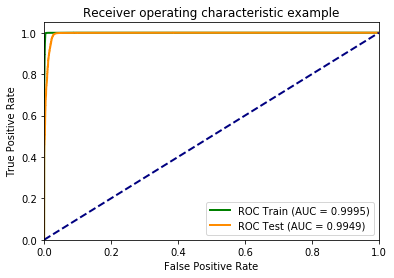

In [342]:
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train_res, y_train_res, X_test, y_test)